## This notebook contains 3 part
Part 1: Apply Neural Network by using Mathematic principle  
Part 2: Apply Neural Network with sklearn  
Part 3: Apply Neural Network with classification  


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
%matplotlib inline

### Part 1: Apply Neural Network by using Mathematic principle 

Let's see what the single-layer, single neuron network give us.  We have a couple of choices to make:
1. We must choose some weights and some biases
2. We must choose an activation function

For now, we will manually specify the weights and biases.

We choose a *sigmoid* activation function

In [5]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def tanh(z1):
    return 2*sigmoid(2*z1)-1

[-5.         -4.97995992 -4.95991984 -4.93987976 -4.91983968]


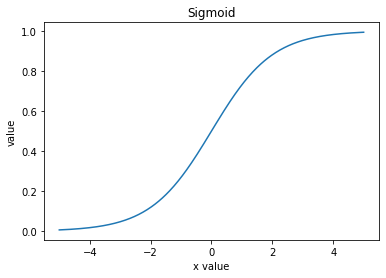

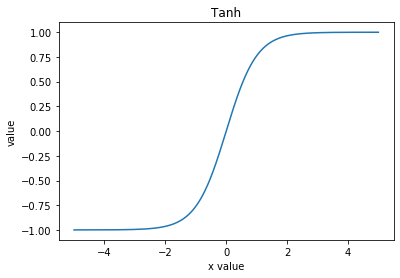

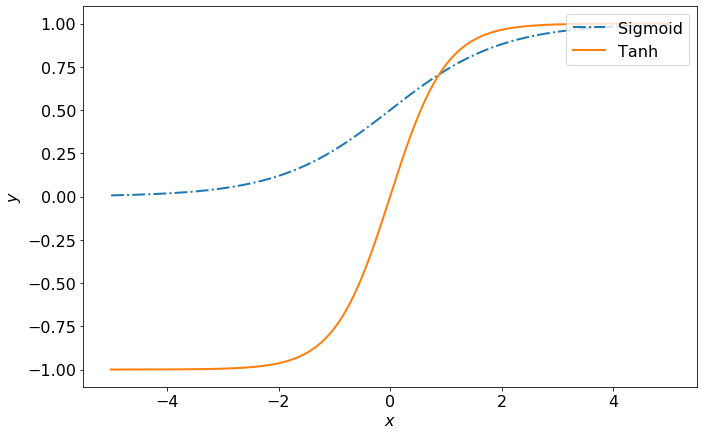

In [61]:
# Generate a list of 500 points from -5 to 5 and plot both the sigmoid and the tanh 
x = np.linspace(-5.0, 5.0, 500) 
print(x[:5])

y = sigmoid(x)
plt.plot(x,y)
plt.title("Sigmoid")
plt.xlabel("x value")
plt.ylabel("value")
plt.show()

y1 = tanh(x)
plt.plot(x,y1)
plt.title("Tanh")  #see that gradient of tanh is stronger than sigmoid, ie derivative are steeper
plt.xlabel("x value")
plt.ylabel("value")
plt.show()

# 2 graphs in 1 pic
fig, ax = plt.subplots(1,1, figsize=(11,7)) # create axes object
SIZE = 16
# Plot
ax.plot(x, y, ls='-.', lw=2, label=r'Sigmoid')
ax.plot(x, y1, lw=2, label=r'Tanh')

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=SIZE) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE) # Make the tick labels big enough to read

ax.legend(fontsize=SIZE, loc=1) # Create a legend and make it big enough to read

##### Comments
* The "steepness" of the sigmoid is controlled by $w$.

Next, try to approximate a Gaussian function using a node

Start by plotting the above function using the $x$ dataset we created earlier

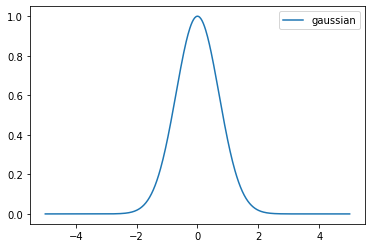

In [7]:
f = np.exp(-x*x) # The real function, x = np.linspace(-5.0, 5.0, 500) input points

plt.plot(x, f, label='gaussian')
plt.legend()

Now, let's code the single node as per the image above. Write a function named `affine` that does the linear transformation.

In [63]:
# your code here
def affine(x, w, b):
    return w*x + b

In [65]:
w1 = -4.5   # weight
b1 = 4.     # bias

h = sigmoid(affine(x,w1,b1))
h

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
      

In [66]:
w2 = -2.5
b2 = 1.0 

# Perceptron output
z = affine(x, w2, b2) 
h2 = sigmoid(z) # Sigmoid activation

And now we plot the activation function and the true function.

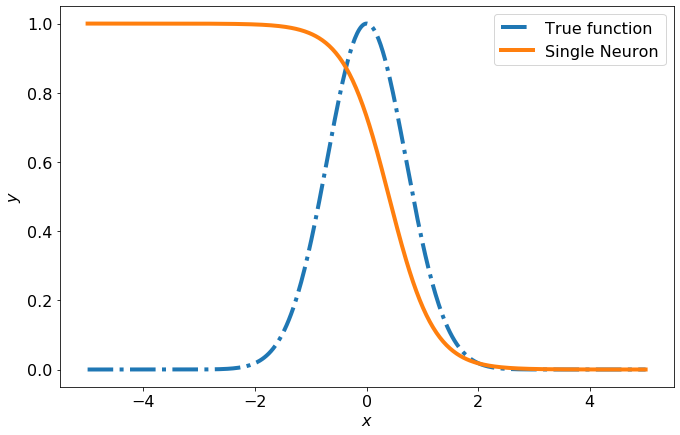

In [67]:
fig, ax = plt.subplots(1,1, figsize=(11,7)) 

SIZE = 16

ax.plot(x, f, ls='-.', lw=4, label=r'True function')
ax.plot(x, h2, lw=4, label=r'Single Neuron')

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=SIZE) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE) # Make the tick labels big enough to read

ax.legend(fontsize=SIZE, loc=1) # Create a legend and make it big enough to read

The single perceptron simply turns the output on and off at some point, but that's about it.  We see that the neuron is on until about $x=0$ at which point it abruptly turns off.  It's able to get "close" to the true function.  Otherwise, it has nothing in common with the true function.

What happens if we play with the weights and biases?

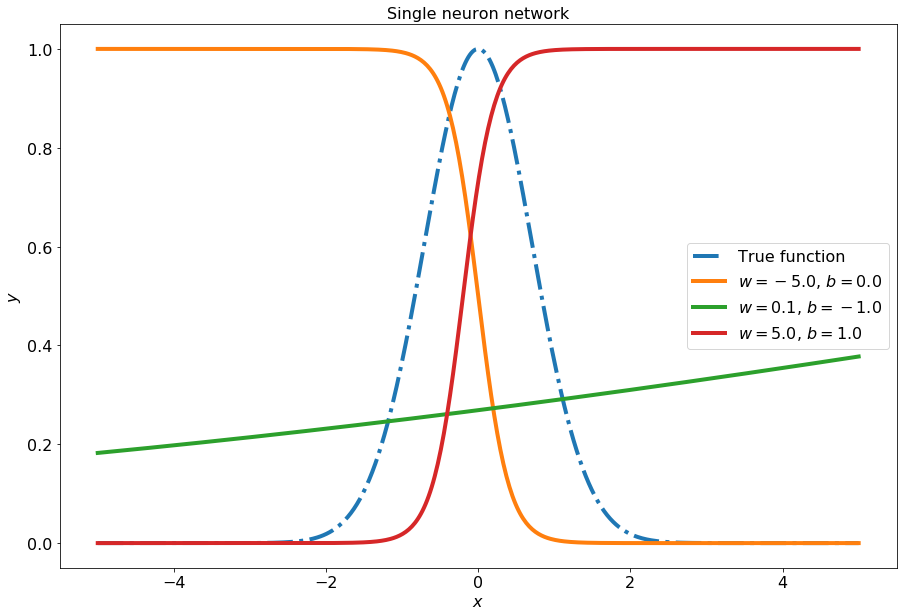

In [68]:
w3 = [-5.0, 0.1, 5.0] # Create a list of weights
b3 = [0.0, -1.0, 1.0] # Create a list of biases

fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot(x, f, lw=4, ls='-.', label='True function')
for wi, bi in zip(w3, b3):
    h3 = sigmoid(affine(x, wi, bi))
    ax.plot(x, h3, lw=4, label=r'$w = {0}$, $b = {1}$'.format(wi,bi))
ax.set_title('Single neuron network', fontsize=SIZE)

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=SIZE) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE) # Make the tick labels big enough to read

ax.legend(fontsize=SIZE, loc='best') # Create a legend and make it big enough to read

Let's try to make our network more flexible by using **more nodes**

## Multiple Perceptrons in a Single Layer
The following figure shows a single-layer network with two nodes in one layer.

![](../fig/multiple-perceptrons.png)

In [16]:
x = np.linspace(-5.0, 5.0, 500) 
f = np.exp(-x*x) 

w = np.array([3.5, -3.5])
b = np.array([3.5, 3.5])

# Affine transformations
z1 = w[0] * x + b[0]
z2 = w[1] * x + b[1]

# Node outputs
h1 = 1.0 / (1.0 + np.exp(-z1))
h2 = 1.0 / (1.0 + np.exp(-z2))

Now let's plot things and see what they look like.

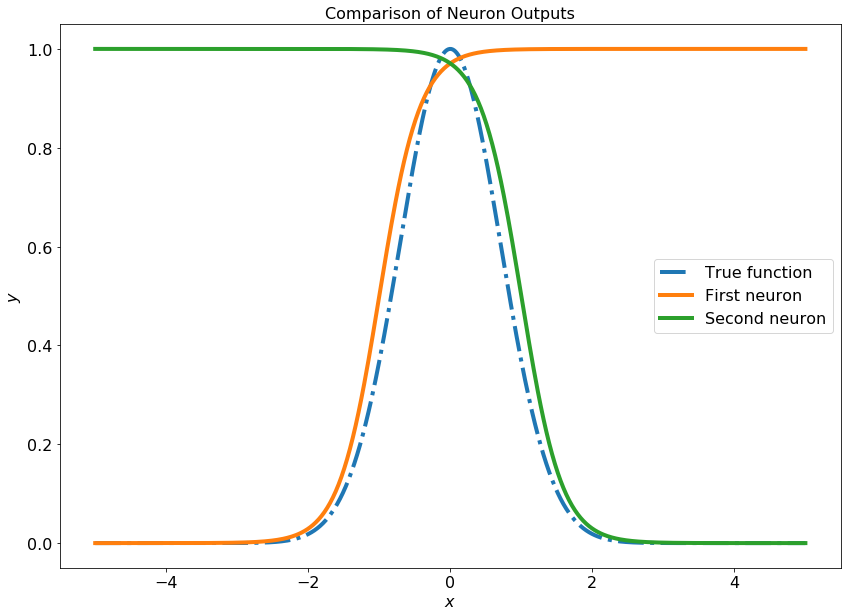

In [17]:
fig, ax = plt.subplots(1,1, figsize=(14,10))

ax.plot(x, f, lw=4, ls = '-.', label='True function')
ax.plot(x, h1, lw=4, label='First neuron')
ax.plot(x, h2, lw=4, label='Second neuron')

# Set title
ax.set_title('Comparison of Neuron Outputs', fontsize=SIZE)

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=SIZE) 
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE)

ax.legend(fontsize=SIZE, loc='best') 

To get the network prediction we must combine these two sigmoid curves 

In [18]:
# Network output
wout = np.ones(2) # Set the output weights to unity to begin
bout = -1 # No bias yet
yout = wout[0] * h1 + wout[1] * h2 + bout

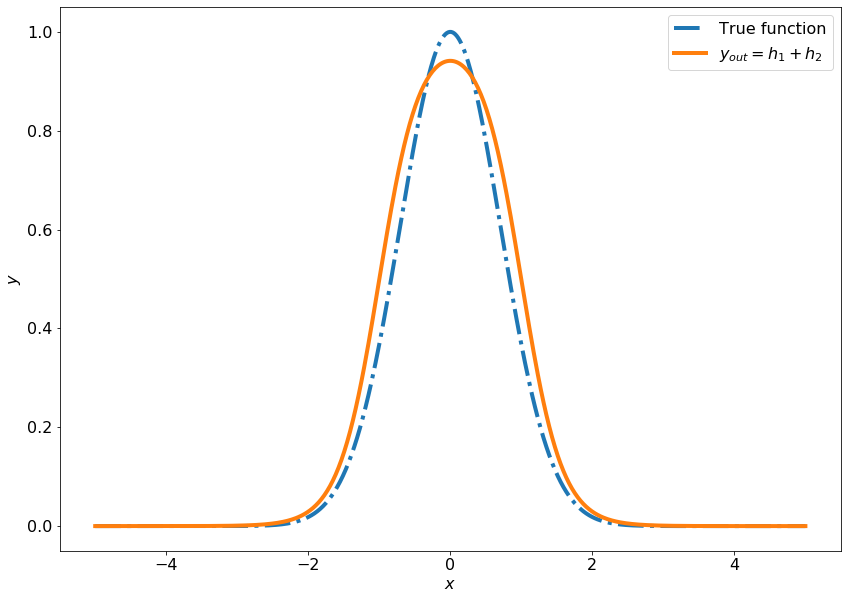

In [19]:
fig, ax = plt.subplots(1,1, figsize=(14,10))

ax.plot(x, f, ls='-.', lw=4, label=r'True function')
ax.plot(x, yout, lw=4, label=r'$y_{out} = h_{1} + h_{2}$')

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=SIZE) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE) # Make the tick labels big enough to read

ax.legend(fontsize=SIZE, loc='best') # Create a legend and make it big enough to read

#### Observations
* The network prediction is still not good. *But*, it is pretty sophisticated.  We just have two neurons, but we get some pretty interesting behavior. We didn't do anything with the output weights.  Those are probably important.  Now let's see what happens when we change the weights on the output.

In [20]:
# Network output
wout = np.array([-1.5, -1.5])
bout = np.array(1.5)

yout = wout[0] * h1 + wout[1] * h2 + bout

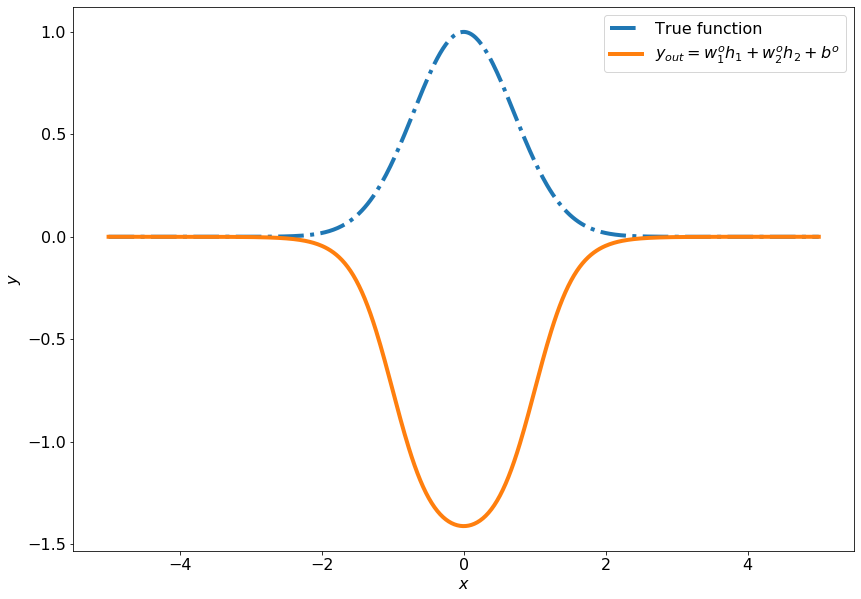

In [21]:
fig, ax = plt.subplots(1,1, figsize=(14,10))

ax.plot(x, f, lw=4, ls = '-.', label='True function')
ax.plot(x, yout, lw=4, label=r'$y_{out} = w_{1}^{o}h_{1} + w_{2}^{o}h_{2} + b^{o}$')

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=SIZE) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE) # Make the tick labels big enough to read

ax.legend(fontsize=SIZE, loc=1) # Create a legend and make it big enough to read

Very cool!  The two nodes interact with each other to produce a pretty complicated-looking function.  It still doesn't match the true function, but now we have some hope.  In fact, it's starting to look a little bit like a Gaussian!

We can do better.  There are three obvious options at this point:
1. Change the number of nodes
2. Change the activation functions
3. Change the weights

### Some Mathematical Notation
Before proceeding, let's learn a more succint way of doing the calculations.  If you have a network with a lot of nodes, then you probably don't want to manually determine the output of each node.  It will take forever.  Instead, you can package the computations up using a more compact notation.  We'll illustrate the ideas with the two-node network.

Suppose we have a single input $x$ to a single-layer two-node network.  We can store the weights from each node in a vector $\mathbf{w} \in \mathbb{R}^{2}$.  Similarly, we can store the biases from each node in a vector $\mathbf{b} \in \mathbb{R}^{2}$.  The affine transformation is then written as $$\mathbf{z} = \mathbf{w}x + \mathbf{b}$$ where the usual laws of vector addition and multiplication by a scalar apply.  Of course, we have that $\mathbf{z} \in \mathbb{R}^{2}$ as well.  Next we evaluate the output from each node.  Formally, we write $$\mathbf{h} = \sigma\left(\mathbf{z}\right)$$ where, once again, $\mathbf{h}\in\mathbb{R}^{2}$.  Moreover, it is *understood* that $\sigma$ operates on each individual element of $\mathbf{z}$ separately.  If we denote each component of $\mathbf{z}$ by $z_{j}, \quad j = 1, 2$ then we can write $$h_{j} = \sigma\left(z_{j}\right), \quad j = 1, 2.$$

Lastly, we must do something about the output layer.  Mathematically we write $$y_{out} = \mathbf{w}_{out} \cdot \mathbf{h} + b_{out}$$ where $\mathbf{w}_{out} \in \mathbb{R}^{2}$ and $b_{out} \in \mathbb{R}$.

## Backpropagation

In [22]:
def affine(x, w, b):
    return w * x + b
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
def gaussian(x):
    return np.exp(-x*x)
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))
def mse(y,yout):
    return np.mean((y-yout)*(y-yout))

In [23]:
x = 1.

##### initialization

w_1 = np.array([1., -1.]) #Inner layer (1st node),2D >> 2 biases >> 2 affines (z) >> 2 activate, sigmoid (h)
b_1 = np.array([1., 1.])

w_2 = np.array([1., -1.]) #Outer layer: yout = wout(2D)*h(2D) + bout(1D)
b_2 = np.array([1.])

In [24]:
### do the forward pass of the network
### out = z3
z1 = affine(x,w_1[0],b_1[0])
z2 = affine(x,w_1[1],b_1[1])

h1 = sigmoid(z1)
h2 = sigmoid(z2)

z3 = w_2[0]*h1 + w_2[1]*h2 + b_2[0]
out1 = z3
out1

1.3807970779778822

In [25]:
actual = gaussian(x)
actual

0.36787944117144233

In [26]:
### To make graph

X = np.linspace(-5.0, 5.0, 500)
z1 = affine(X,w_1[0],b_1[0])
z2 = affine(X,w_1[1],b_1[1])

h1 = sigmoid(z1)
h2 = sigmoid(z2)

z3 = w_2[0]*h1 + w_2[1]*h2 + b_2[0]
out = z3
out

array([0.02045883, 0.02086616, 0.02128146, 0.02170488, 0.02213658,
       0.02257671, 0.02302543, 0.0234829 , 0.02394929, 0.02442475,
       0.02490947, 0.02540362, 0.02590736, 0.02642088, 0.02694436,
       0.02747799, 0.02802194, 0.02857642, 0.02914161, 0.02971772,
       0.03030494, 0.03090347, 0.03151353, 0.03213532, 0.03276906,
       0.03341496, 0.03407324, 0.03474413, 0.03542785, 0.03612464,
       0.03683472, 0.03755834, 0.03829575, 0.03904717, 0.03981286,
       0.04059308, 0.04138809, 0.04219813, 0.04302347, 0.04386439,
       0.04472115, 0.04559403, 0.04648331, 0.04738927, 0.0483122 ,
       0.04925239, 0.05021013, 0.05118572, 0.05217948, 0.05319169,
       0.05422268, 0.05527275, 0.05634224, 0.05743145, 0.05854072,
       0.05967037, 0.06082075, 0.0619922 , 0.06318504, 0.06439963,
       0.06563633, 0.06689548, 0.06817744, 0.06948258, 0.07081126,
       0.07216386, 0.07354073, 0.07494227, 0.07636885, 0.07782086,
       0.07929869, 0.08080272, 0.08233335, 0.08389097, 0.08547

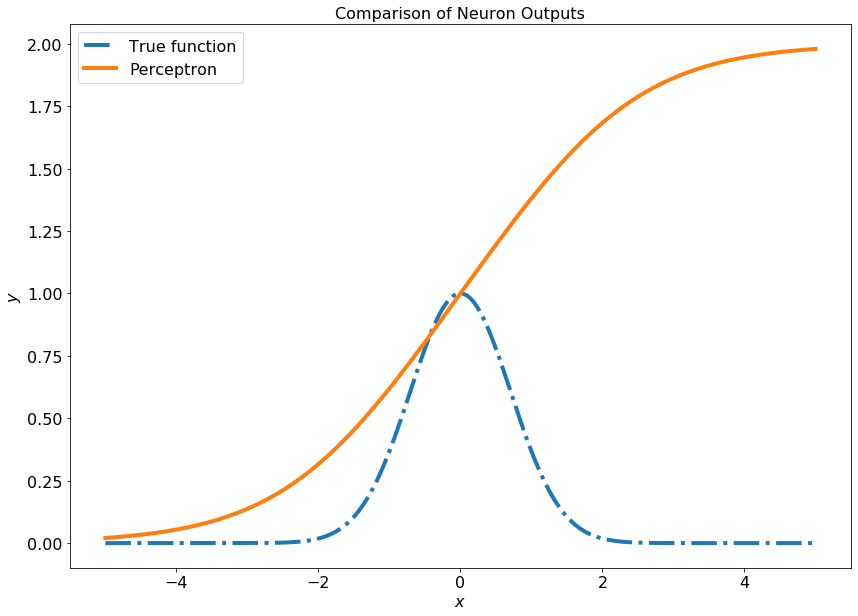

In [27]:
X = np.linspace(-5.0, 5.0, 500)

fig, ax = plt.subplots(1,1, figsize=(14,10))

ax.plot(X, gaussian(X), lw=4, ls = '-.', label='True function')
ax.plot(X, out, lw=4, label='Perceptron')

# Set title
ax.set_title('Comparison of Neuron Outputs', fontsize=SIZE)

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=SIZE) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE) # Make the tick labels big enough to read

ax.legend(fontsize=SIZE, loc='best') # Create a legend and make it big enough to read

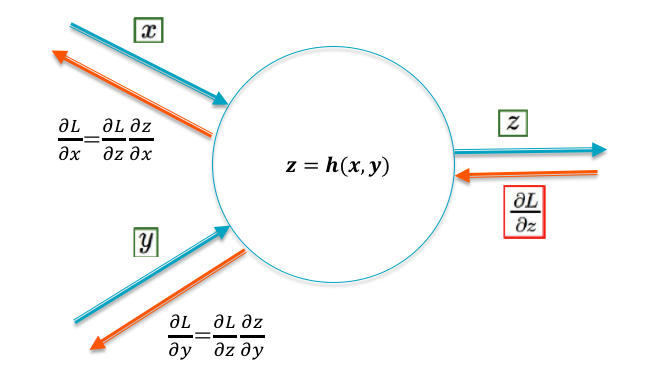

In [30]:
#### DERIVATIVES CALCULATION
### enter your code here 
dh3 = out1 - actual
dz3 = dh3*1
dh1 = dz3*w_2[0]
dh2 = dz3*w_2[1]
dz1 = dh1*sigmoid_derivative(z1)
dz2 = dh1*sigmoid_derivative(z2)
db2 = dz3
dw20 = dz3*h1
dw21 = dz3*h2
db10 = dz1
db11 = dz1
dw10 = dz1*x
dw11 = dz2*x


##### WEIGHTS UPDATE
### enter your code here 
lr = 0.001

w_1[0] -= lr*dw10
b_1[0] -= lr*db10
w_1[1] -= lr*dw11
b_1[1] -= lr*db11

w_2[0] -= lr*dw20
b_2[0] -= lr*db2
w_2[1] -= lr*dw21

In [31]:
### do again the forward pass of the network
### out = z3

# Affine transformation
z1 = affine(x,w_1[0],b_1[0])
z2 = affine(x,w_1[1],b_1[1])

# Node outputs
h1 = sigmoid(z1)
h2 = sigmoid(z2)

z3 = w_2[0]*h1 + w_2[1]*h2 + b_2[0]
out = z3
out   
# Note that before transformation, out = 1.38... 
# out value decreases and get closer to our actual value 

1.378812732246359

Now let's write it into a loop

In [32]:
N = 50000
lr = 0.01

In [33]:
X = np.linspace(-5.0, 5.0, 500)

batch_size = 10

##### initialization

w_1 = np.array([1., -1.])
b_1 = np.array([1., 1.])

w_2 = np.array([1., -1.])
b_2 = np.array([1.])


for i in range(N):
    X_train = np.random.permutation(X)  
    #Permutation = No. of total combinations regards to their order
    
    for batch_id in range(int(len(X_train)/batch_size)):
        x = X_train[batch_id*batch_size:(batch_id+1)*batch_size]
            
        #### FORWARD PASS
        # Affine transformation
        z1 = affine(x,w_1[0],b_1[0])
        z2 = affine(x,w_1[1],b_1[1])

        # Node outputs
        h1 = sigmoid(z1)
        h2 = sigmoid(z2)

        z3 = w_2[0]*h1 + w_2[1]*h2 + b_2[0]
        out = z3
    
        #### DERIVATIVES CALCULATION
        actual = gaussian(x)
        dh3 = out - actual
        dz3 = dh3*1
        dh1 = dz3*w_2[0]
        dh2 = dz3*w_2[1]
        dz1 = dh1*sigmoid_derivative(z1)
        dz2 = dh1*sigmoid_derivative(z2)
        db2 = dz3
        dw20 = dz3*h1
        dw21 = dz3*h2
        db10 = dz1
        db11 = dz1
        dw10 = dz1*x
        dw11 = dz2*x

        ##### WEIGHTS UPDATE
        lr = 0.001

        w_1[0] -= lr*sum(dw10)
        b_1[0] -= lr*sum(db10)
        w_1[1] -= lr*sum(dw11)
        b_1[1] -= lr*sum(db11)

        w_2[0] -= lr*sum(dw20)
        b_2[0] -= lr*sum(db2)
        w_2[1] -= lr*sum(dw21)

Now let's plot things and see what they look like.

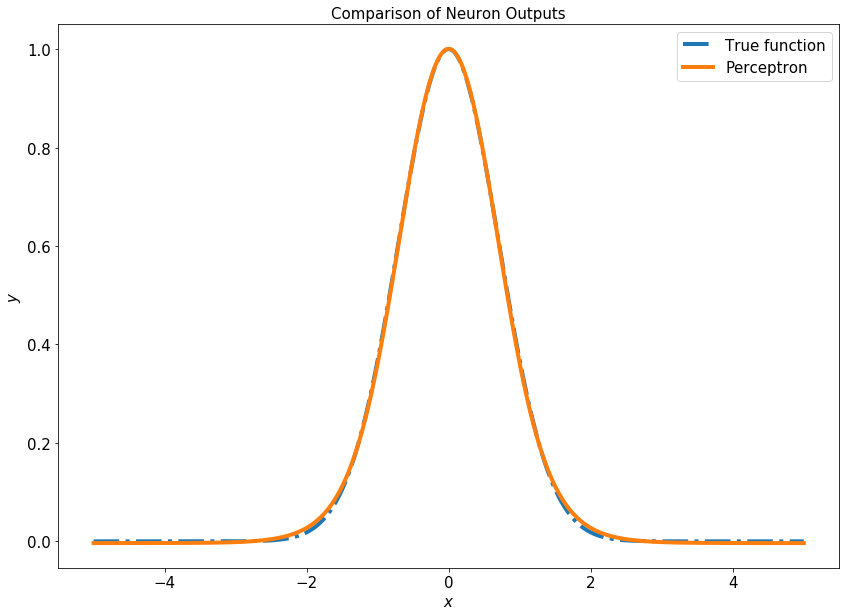

In [34]:
z1 = affine(X,w_1[0],b_1[0])
z2 = affine(X,w_1[1],b_1[1])
h1 = sigmoid(z1)
h2 = sigmoid(z2)
z3 = w_2[0]*h1 + w_2[1]*h2 + b_2[0]
out = z3


SIZE = 15

fig, ax = plt.subplots(1,1, figsize=(14,10))

ax.plot(X, gaussian(X), lw=4, ls = '-.', label='True function')
ax.plot(X, out, lw=4, label='Perceptron')
#ax.plot(x, h2, lw=4, label='Second neuron')

# Set title
ax.set_title('Comparison of Neuron Outputs', fontsize=SIZE)

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=SIZE) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE) # Make the tick labels big enough to read

ax.legend(fontsize=SIZE, loc='best') # Create a legend and make it big enough to read

## Part 2: Apply Neural Network with sklearn 

In [35]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split 

In [39]:
regr = MLPRegressor(hidden_layer_sizes =(2,),  #One hidden layer with two nodes
                    activation='tanh',  #sigmoid is not available in MLPRegressor
                    solver='sgd',
                    learning_rate_init=0.01,
                    random_state=42)

In [37]:
X = np.linspace(-5.0, 5.0, 5000)
y = np.array([gaussian(x) for x in X])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

X_train = X_train.reshape(-1,1)  #Actually we have only 1 dimension
                                 #But sklean needs 2 dimensions, it has to know where to start and to stop
X_test.sort()
X_test = X_test.reshape(-1,1)

#(-1,1) simply means that it is an unknown dimension and we want numpy to figure it out. 
# And numpy will figure this by looking at the 'length of the array and remaining dimensions'
# It can be (-1,n) or (n,-1) but not (-1,-1)
# (-1,1) here = At least shape of sample, if we don't reshape, we have at least shape of value

In [40]:
regr.fit(X_train, y_train)

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(2,), learning_rate='constant',
             learning_rate_init=0.01, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=42, shuffle=True, solver='sgd', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [41]:
X_test.sort()

In [42]:
pred = regr.predict(X_test)

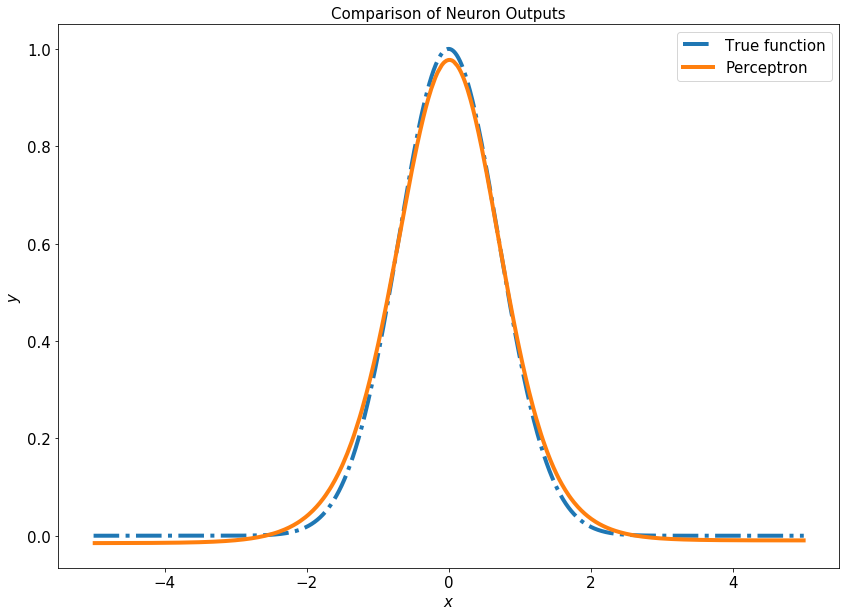

In [43]:
SIZE = 15

fig, ax = plt.subplots(1,1, figsize=(14,10))

ax.plot(X, gaussian(X), lw=4, ls = '-.', label='True function')
ax.plot(X_test.reshape(-1), pred, lw=4, label='Perceptron')
#ax.plot(x, h2, lw=4, label='Second neuron')

# Set title
ax.set_title('Comparison of Neuron Outputs', fontsize=SIZE)

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=SIZE) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE) # Make the tick labels big enough to read

ax.legend(fontsize=SIZE, loc='best') # Create a legend and make it big enough to read

## Part 3: Apply Neural Network with classification  

In [69]:
# Same problem, but now the result from sigmoid will be put in class
# You will see that going from regression to classification problem doesn't change anything
# (Still have node, activation function, weight etc.)

from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame

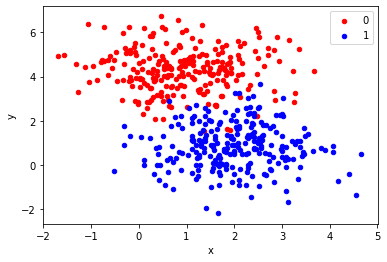

In [49]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=0) #n_features = dimension that we want
#Scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig,ax = pyplot.subplots()
grouped = df.groupby('label')
for key,group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [50]:
X.shape

(500, 2)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [52]:
x = X_test

In [53]:
# We have 2 inputs, linear operation and activation >> Just to start with something small
# Will how this small network works with our data set above

#Initialization
w_1 = np.array([1,1])
b_1 = np.array([1])
z1 = w_1.dot(x.T) + b_1

#Node outputs
h1 = sigmoid(z1)

In [54]:
# We used sigmoid function in our node >> The result will be in the range 0-1
# So, we make cutoff at 0.5 for classification
# Belows 0.5 = Class 0, above = class 1

pred = [int(score > 0.5) for score in h1]  
sum(pred == y_test) / len(y_test) #See how many point correspond to the true value of this point
# Our result = 0.45 = 45%

0.45

In [55]:
# Loop
N = 10000
batch_size = 10

# Initialization
w_1 = np.array([1,1])
b_1 = np.array([1])

for i in range(N):
    perm = np.random.permutation(len(X_train))   #permutation of each epoch
    X_train = X_train[perm]
    y_train = y_train[perm]
    
    for batch_id in range(int(len(X_train)/batch_size)):
        x = X_train[batch_id*batch_size:(batch_id+1)*batch_size]
        y = y_train[batch_id*batch_size:(batch_id+1)*batch_size]
        
        z1 = w_1.dot(x.T) + b_1
        h1 = sigmoid(z1)
                
        dh1 = h1-y
        dz1 = dh1*sigmoid_derivative(z1)
        dw1 = dz1*x.T
        db1 = dz1
        w_1 = w_1 - lr*np.sum(dw1, axis=1)
        b_1 = b_1 - lr*np.sum(db1)

In [56]:
x = X_test
z1 = w_1.dot(x.T) + b_1
h1 = sigmoid(z1)

In [57]:
h1.shape

(100,)

In [59]:
pred = [int(score > 0.5) for score in h1]
sum(pred == y_test)/ len(y_test)

0.95

In [ ]:
img[130][100].shape

In [ ]:
img[130]

In [ ]:
img[:,:,2] # selects all rows, 1st column, and all slices